*** PCA 2 (Core) ***

Visualización de Datos con Componentes Principales

Descripción:

En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «Iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

Enlace al dataset: https://www.kaggle.com/uciml/iris

Objetivo:

El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.

# 1. Carga de datos y exploración y preprocesamiento de datos

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
# cargar el dataset
data = pd.read_csv('../data/Iris.csv')


In [13]:
print(data.shape)
print(data.columns)
data.info()
data.head(5)

(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
print("Valores faltantes:", data.isnull().sum())
data.describe()

Valores faltantes: Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
data['Species'] = data['Species'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    float64 
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Species        150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.2 KB


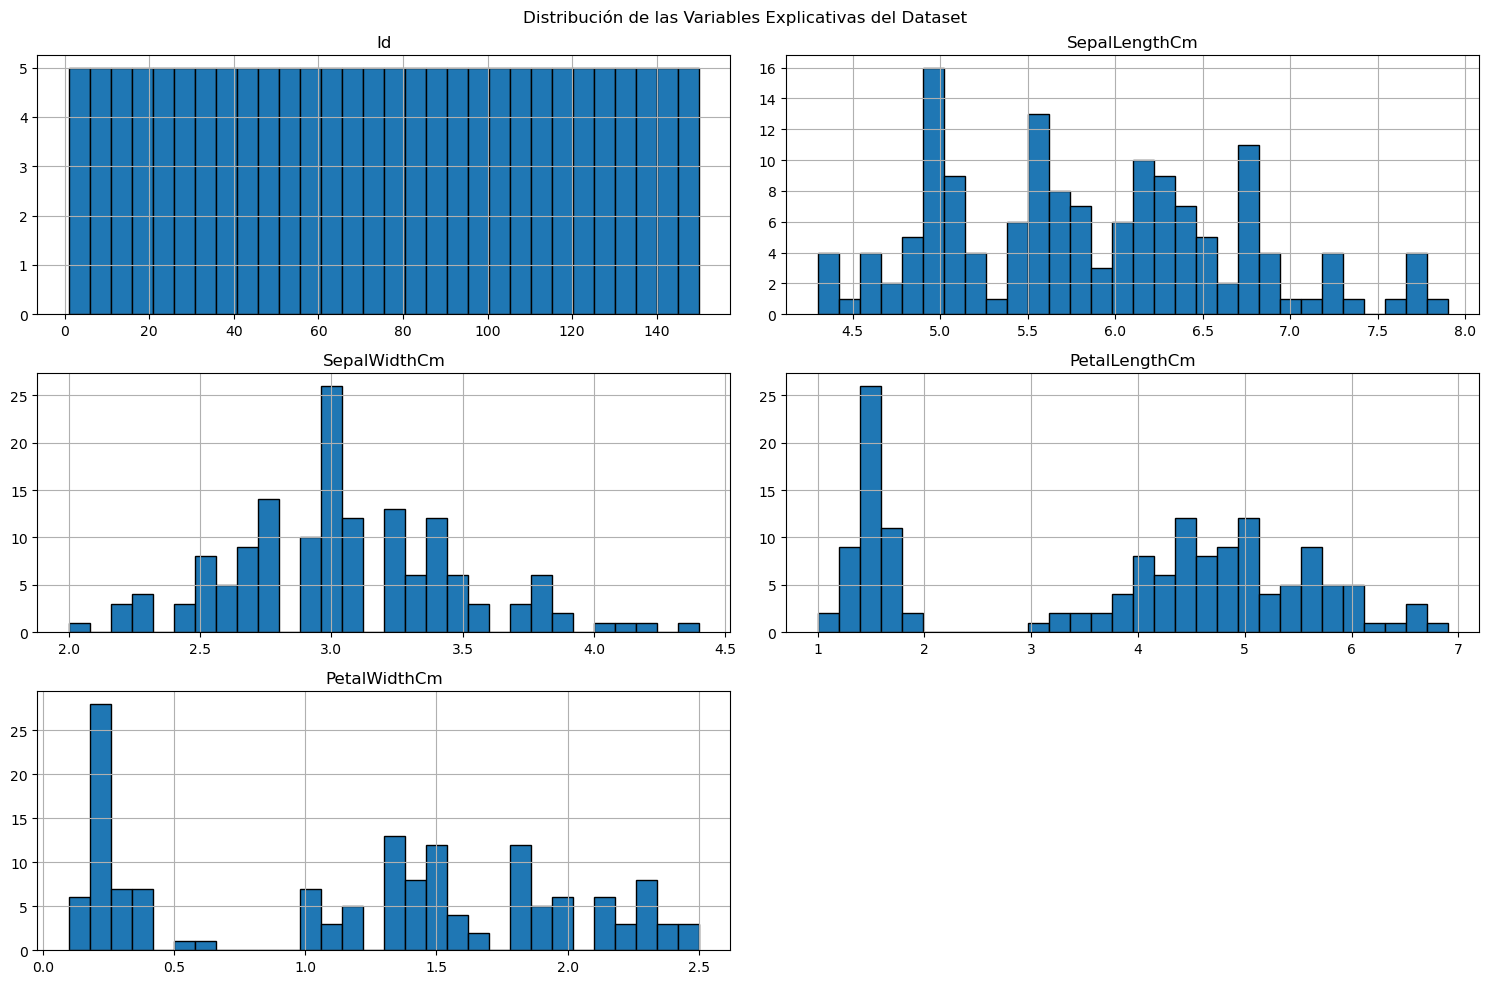

In [20]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset')
plt.tight_layout()
plt.show()

In [23]:
# Separar las características (X) y el target (y)
X = data.drop(columns=['Species', 'Id'])  # Variables predictoras
y = data['Species']                 # Variable objetivo

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir Species a 0, 1, 2
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 2. Aplicación de PCA:

In [25]:
# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Obtener la varianza explicada por los dos componentes
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print(f"Varianza explicada por los dos componentes principales: {total_explained_variance:.2%}")

Varianza explicada por los dos componentes principales: 95.80%


# 3. Visualización de los componentes principales:

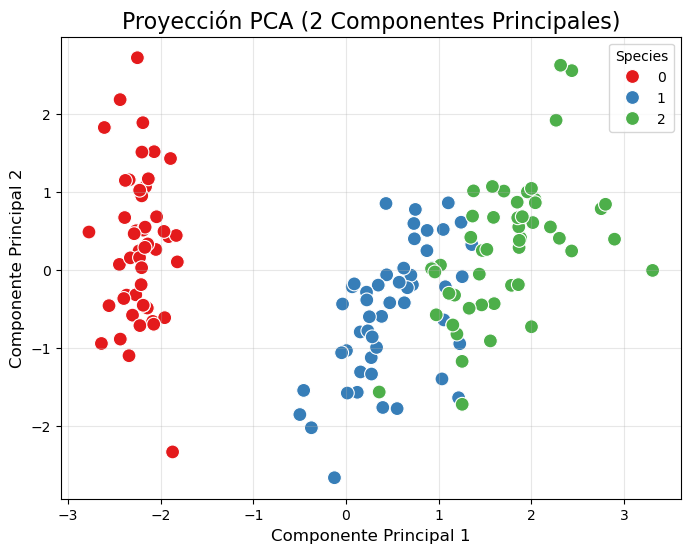

In [26]:
# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

# Configurar el gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species', palette='Set1', s=100)

# Añadir título y etiquetas
plt.title('Proyección PCA (2 Componentes Principales)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Species')
plt.grid(alpha=0.3)
plt.show()

# 4. Interpretación de los resultados:

In [ ]:
# Obtener los coeficientes del PCA
coeficientes = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(coeficientes)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
PC1       0.522372     -0.263355       0.581254      0.565611
PC2       0.372318      0.925556       0.021095      0.065416


* Para el pc1 el SepalLength, el PetalLength y el PetalWidth influyen mas y en una misma medida
* Para el pc2 el SepalWidth es la caracteristica mas importante e influyente y en menor medida el SepalLength
* El PCA para esta caso separa correctamente las variables ya que se puede observar 2 tipos de flores similares por un lado
y por el otro lado el tercer tipo muy distinto

## Compara la distribución de las clases en el espacio bidimensional con la distribución original de las variables. 

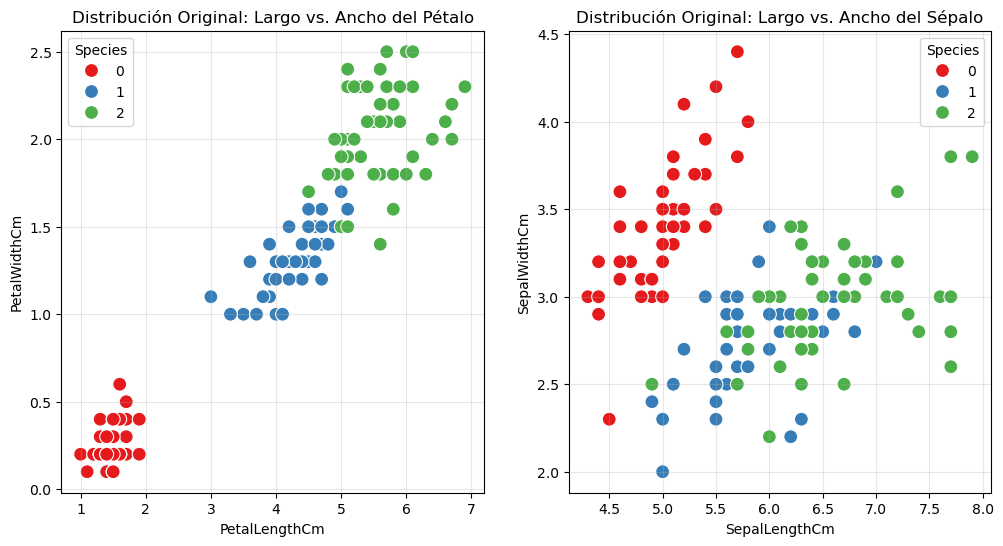

In [29]:
# Graficar una combinación de variables originales
plt.figure(figsize=(12, 6))

# Largo vs. ancho del pétalo
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='Set1', s=100)
plt.title('Distribución Original: Largo vs. Ancho del Pétalo')
plt.grid(alpha=0.3)

# Largo vs. ancho del sépalo
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set1', s=100)
plt.title('Distribución Original: Largo vs. Ancho del Sépalo')
plt.grid(alpha=0.3)

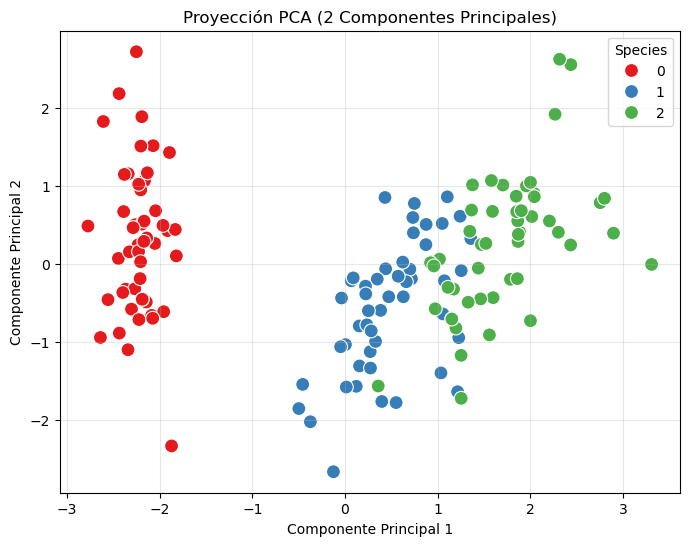

In [30]:
# Proyección en el espacio PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species', palette='Set1', s=100)
plt.title('Proyección PCA (2 Componentes Principales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(alpha=0.3)
plt.show()